In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [20]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Apply peak finding algorithm to Signal FFTS

In [6]:
# Get a signal to test
wood = Sound('soundfiles/flax_carbon/Wood_D0_2.wav')
wood.condition()
carbon = Sound('soundfiles/flax_carbon/Carbon_D0_2.wav')
carbon.condition()

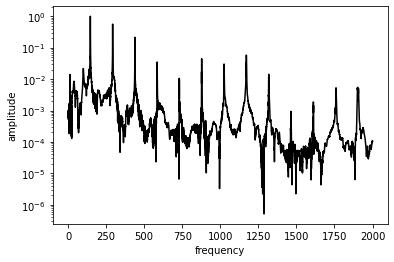

In [105]:
wood.signal.plot(kind='fft', color='k')

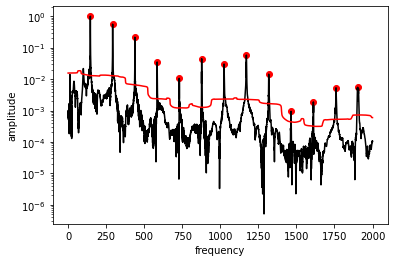

In [108]:
max_index = np.where(wood.signal.fft_freqs >= guit.SP.general.fft_range.value)[0][0]

freq = wood.signal.fft_freqs[np.argmax(wood.signal.fft)]
peak_distance = np.argmax(wood.signal.fft)//2

peak_indexes, _ = sig.find_peaks(wood.signal.fft[:max_index], height=min_height, distance=peak_distance)

number_of_peaks = len(peak_indexes)
average_len = int(max_index/number_of_peaks)*3
average_fft = sig.savgol_filter(wood.signal.fft[:max_index], average_len, 1, mode='mirror')*2

peak_indexes, _ = sig.find_peaks(wood.signal.fft[:max_index], height=average_fft, distance=peak_distance)

peak_values = wood.signal.fft[peak_indexes]
freq_values = wood.signal.fft_freqs[peak_indexes]

wood.signal.plot(kind='fft', color='k')
ax = plt.gca()
ax.scatter(freq_values, peak_values, color='r')
ax.plot(wood.signal.fft_freqs[:max_index], average_fft, color='r')
plt.show()